In [1]:
import os, numpy as np, matplotlib.pyplot as plt
from sys import path
crobar_path = os.path.join('./crobar/python_modules/')
path.append(crobar_path)

from util import bindown2

In [23]:
nz0 = 1951
save_dir = 'save'

alpha = 3/1.0e11
alphastr = str(round(alpha/1.0e-11,3))

date = '2020/04/28 11:13:30'
datestr = '20200428_111330'

limb_savefile = os.path.join(save_dir,'limb_mask_'+datestr+'_'+alphastr+'.npz')

limb_mask_load = dict(np.load(limb_savefile))
limb_mask = limb_mask_load['arr_0']

In [19]:
file0 = './em3d_slices/emis_slice_0000.npz'
ld = np.load(file0)
slice = ld['slice']
nx0,ny0 = slice.shape
binfac = 3
savename = './save/hmap_cube_bindown3.npz'

In [6]:
edges = np.mod(np.array([nx0,ny0,nz0]),binfac)
nx,ny,nz = np.floor(np.array([nx0,ny0,nz0])/binfac).astype(np.int32)
xl0,yl0,zl0 = np.floor(0.5*edges).astype(np.int32)
xh0,yh0,zh0 = xl0+binfac*nx,yl0+binfac*ny,zl0+binfac*nz
xa = (0.5+np.arange(nx))*binfac+xl0
ya = (0.5+np.arange(ny))*binfac+yl0
za = (0.5+np.arange(nz))*binfac+zl0
print(nx0,ny0,nz0)
print(nx,ny,nz)
print(edges)
print(xl0,yl0,zl0)
print(xh0,yh0,zh0)
print(np.min(xa),np.min(ya),np.min(za))
print(np.max(xa),np.max(ya),np.max(za))

2298 2399 1951
766 799 650
[0 2 1]
0 1 0
2298 2398 1950
1.5 2.5 1.5
2296.5 2396.5 1948.5


In [7]:
em3d = np.zeros([nx,ny,nz],dtype=np.float32)
for i in range(0,nz):
	for j in range(0,binfac):
		ii = i*binfac+j
		fname = './em3d_slices/emis_slice_'+str(ii).zfill(4)+'.npz'
		ld = np.load(fname)
		em3d[:,:,i] += bindown2((ld['slice']*limb_mask[:,:,ii])[xl0:xh0,yl0:yh0],binfac)
		print(i,j,ii)

0 0 0
0 1 1
0 2 2
1 0 3
1 1 4
1 2 5
2 0 6
2 1 7
2 2 8
3 0 9
3 1 10
3 2 11
4 0 12
4 1 13
4 2 14
5 0 15
5 1 16
5 2 17
6 0 18
6 1 19
6 2 20
7 0 21
7 1 22
7 2 23
8 0 24
8 1 25
8 2 26
9 0 27
9 1 28
9 2 29
10 0 30
10 1 31
10 2 32
11 0 33
11 1 34
11 2 35
12 0 36
12 1 37
12 2 38
13 0 39
13 1 40
13 2 41
14 0 42
14 1 43
14 2 44
15 0 45
15 1 46
15 2 47
16 0 48
16 1 49
16 2 50
17 0 51
17 1 52
17 2 53
18 0 54
18 1 55
18 2 56
19 0 57
19 1 58
19 2 59
20 0 60
20 1 61
20 2 62
21 0 63
21 1 64
21 2 65
22 0 66
22 1 67
22 2 68
23 0 69
23 1 70
23 2 71
24 0 72
24 1 73
24 2 74
25 0 75
25 1 76
25 2 77
26 0 78
26 1 79
26 2 80
27 0 81
27 1 82
27 2 83
28 0 84
28 1 85
28 2 86
29 0 87
29 1 88
29 2 89
30 0 90
30 1 91
30 2 92
31 0 93
31 1 94
31 2 95
32 0 96
32 1 97
32 2 98
33 0 99
33 1 100
33 2 101
34 0 102
34 1 103
34 2 104
35 0 105
35 1 106
35 2 107
36 0 108
36 1 109
36 2 110
37 0 111
37 1 112
37 2 113
38 0 114
38 1 115
38 2 116
39 0 117
39 1 118
39 2 119
40 0 120
40 1 121
40 2 122
41 0 123
41 1 124
41 2 125
42 0 1

In [8]:
from scipy.ndimage import gaussian_filter
em3d = gaussian_filter(em3d,1)

In [21]:
np.savez(savename,hmap=em3d,xa=xa,ya=ya,za=za)

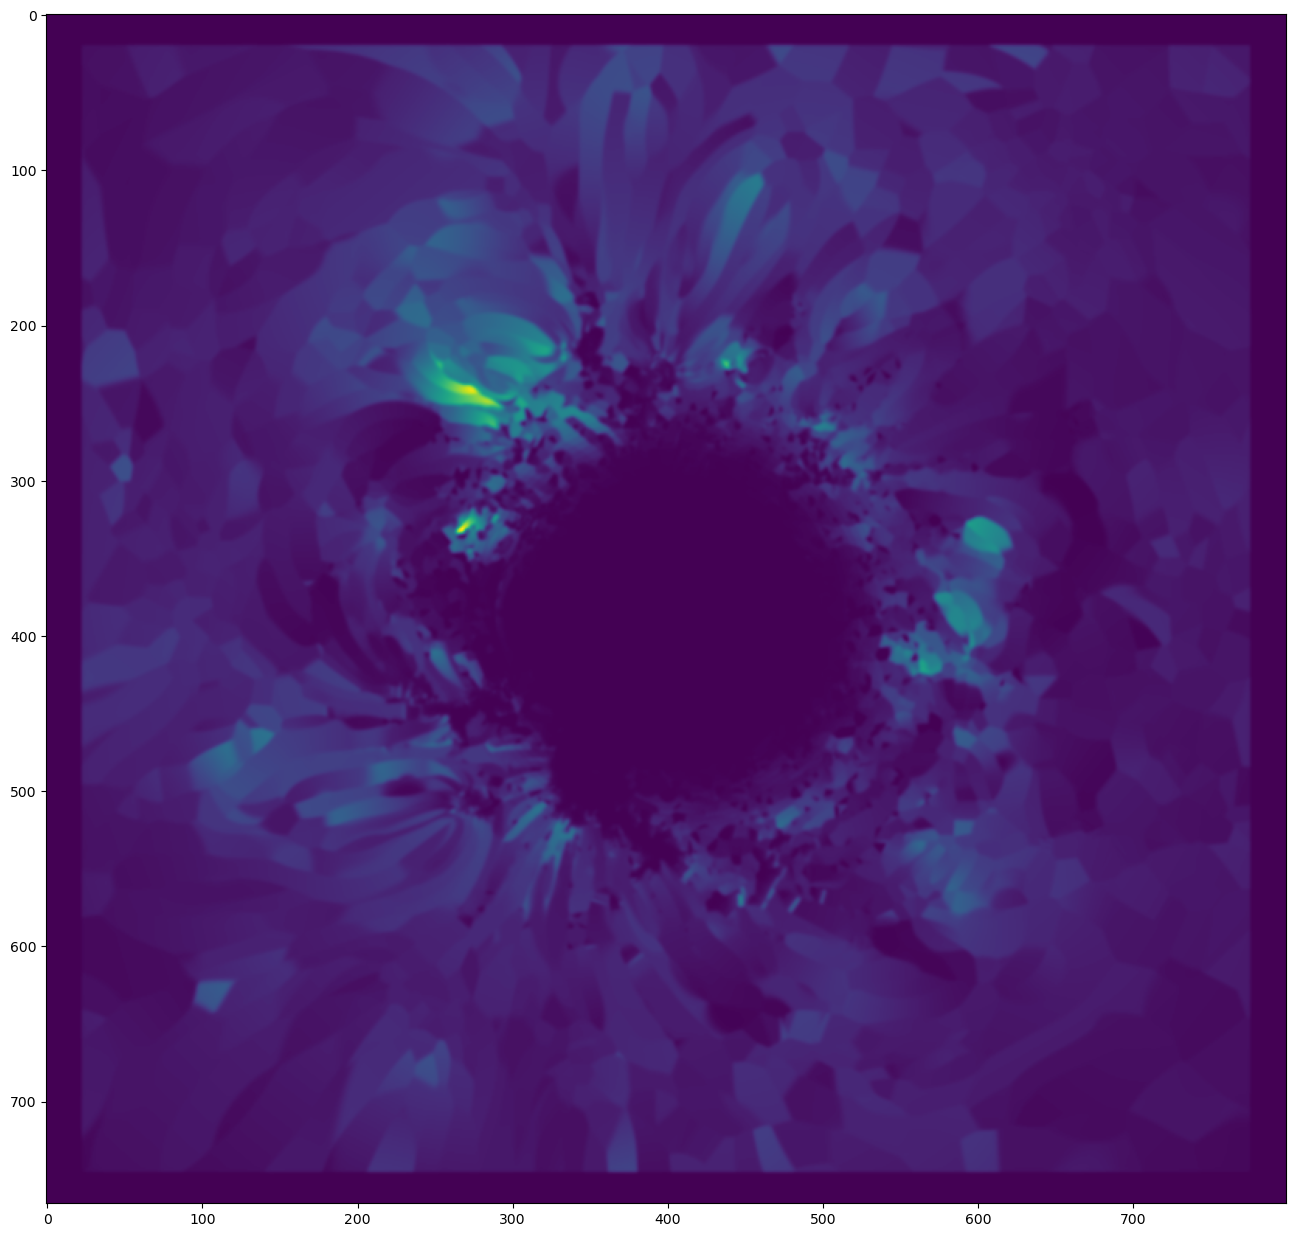

In [12]:
fig=plt.figure(figsize=[16,16])
plt.imshow(em3d[:,:,95])

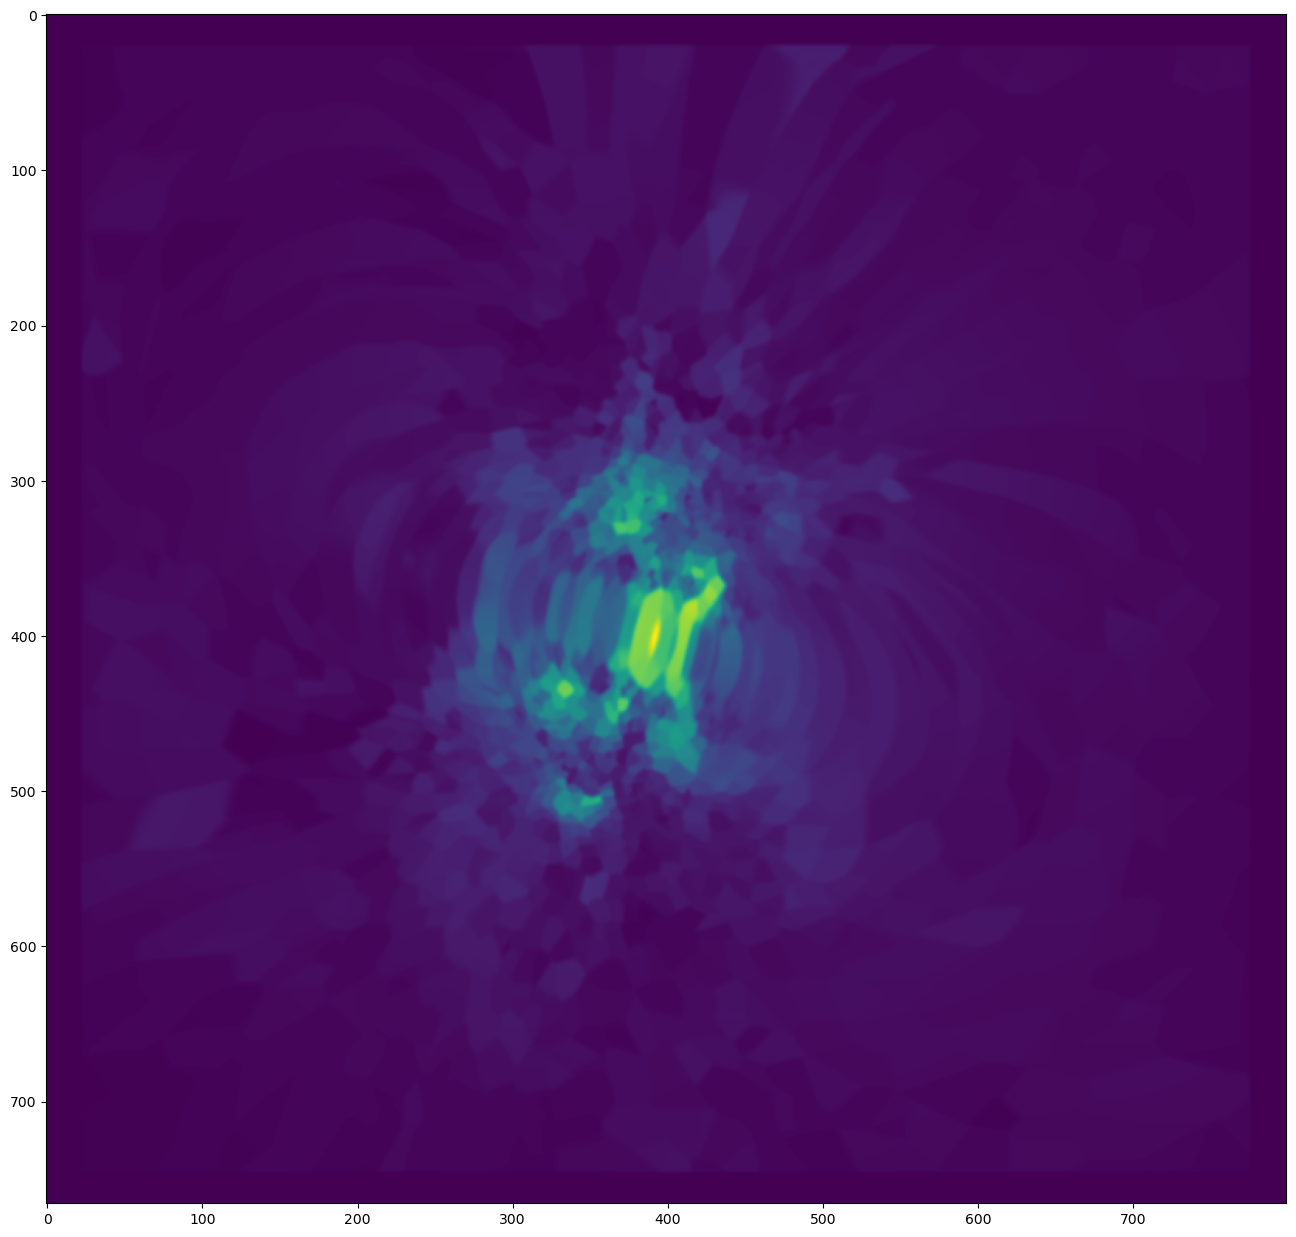

In [15]:
fig=plt.figure(figsize=[16,16])
plt.imshow(em3d[:,:,165])

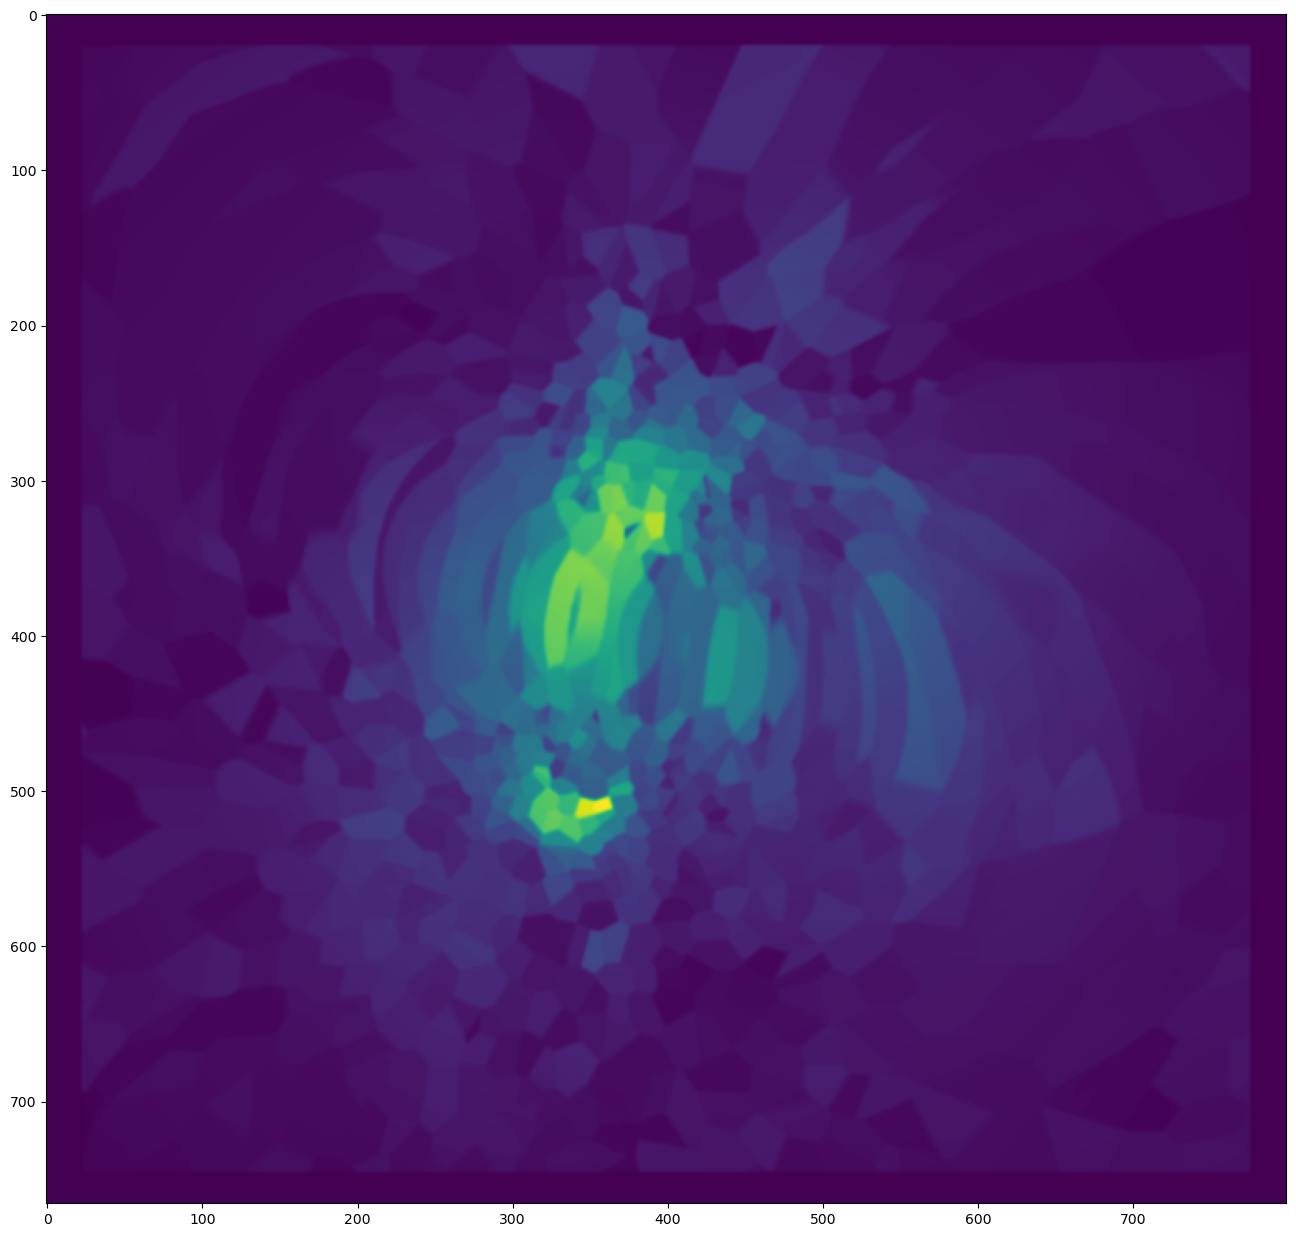

In [17]:
fig=plt.figure(figsize=[16,16])
plt.imshow(em3d[:,:,233])

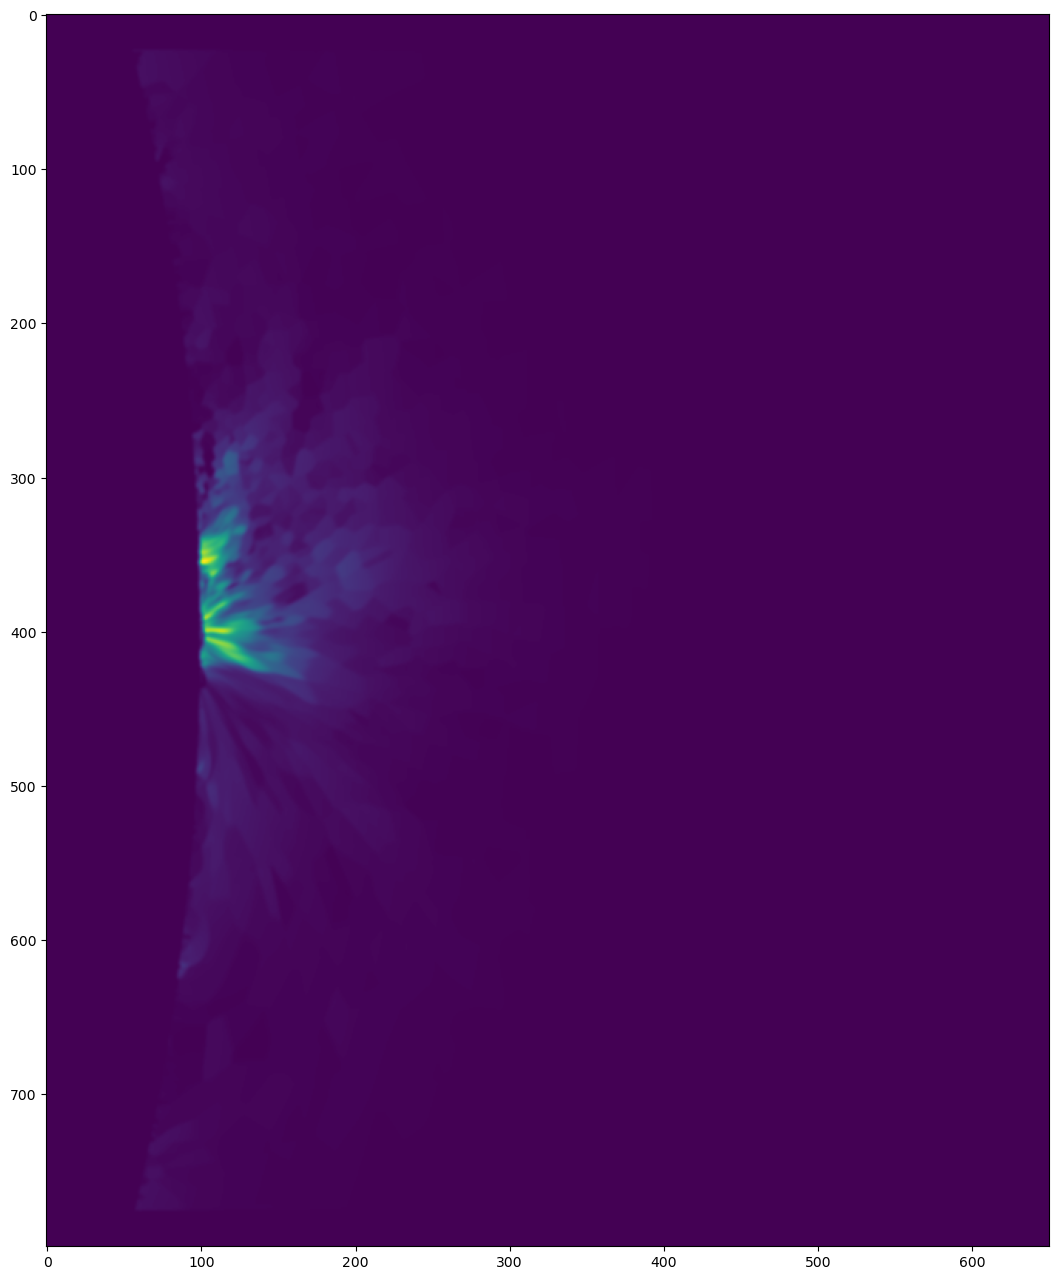

In [18]:
fig=plt.figure(figsize=[16,16])
plt.imshow(em3d[350,:,:])